In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as LA
import cmath as cm
import pandas as pd

%matplotlib inline

In [3]:
out0 = pd.read_csv('~/Scripts/quantTechLab/Qutrit_experiment/21_07/data_21-07-2018_01-59_port0.csv', 
                   names = ['intensity', 'time'])
out1 = pd.read_csv('~/Scripts/quantTechLab/Qutrit_experiment/21_07/data_21-07-2018_01-59_port1.csv', 
                   names = ['intensity', 'time'])
out2 = pd.read_csv('~/Scripts/quantTechLab/Qutrit_experiment/21_07/data_21-07-2018_01-59_port2.csv', 
                   names = ['intensity', 'time'])

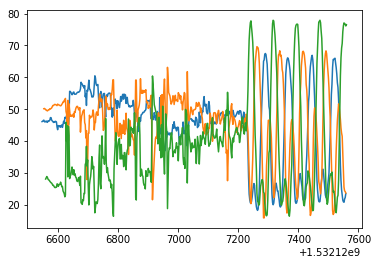

In [4]:
plt.plot(out0['time'], out0['intensity'])
plt.plot(out1['time'], out1['intensity'])
plt.plot(out2['time'], out2['intensity'])

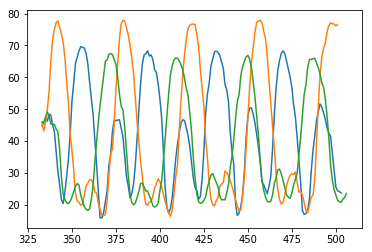

In [5]:
plt.plot(out1['intensity'][333:])
plt.plot(out2['intensity'][333:])
plt.plot(out0['intensity'][333:])

In [6]:
#cutting the noise in the beginning of series
#http://moviebuster.tv/serialsub/2160-the-handmaids-tale.html

out0 = out0[335:]
out1 = out1[335:]
out2 = out2[335:]

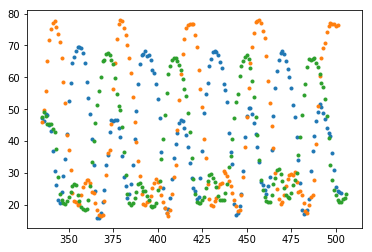

In [7]:
plt.plot(out1['intensity'], '.')
plt.plot(out2['intensity'], '.')
plt.plot(out0['intensity'], '.')

In [8]:
print(len(out0))
print(len(out1))
print(len(out2))


172
169
167


In [9]:
#Searching for local extrema in signals

from scipy.signal import argrelextrema
#df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
#df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal, order=n)[0]]['data']

#out0.iloc[argrelextrema(out0.data.values, np.greater_equal, order=n)[0]]['intensity']
n = 3
out0.iloc[argrelextrema(out0.intensity.values, np.greater_equal, order=n)].index.values

array([336, 353, 372, 390, 409, 430, 450, 468, 488, 506])

In [10]:
# Эта функция подбирает такое число соседей n для функции поиска локальных экстремумов, чтобы находились только "большие" экстермумы
def stable_n(data):
    lens = []
    N = len(data.intensity.values) // 2
    for n in range(1, N):
        lens.append(len(data.iloc[argrelextrema(data.intensity.values, np.greater_equal, order=n)].index.values))
    #plt.plot(lens) # illustration: number of extrema vs. number of neighbours, we are aiming for second plateau

    ind = []
    for i in range(len(lens)-2):
        if (lens[i] == lens[i+1]) & (lens[i+1] == lens[i+2]):
            ind.append(i+1)

    for i in range(1, len(ind) - 1):
        if (ind[i+1] - ind[i] == 1) & (ind[i] - ind[i-1] != 1):
            r = (ind[i+1])
            break

    return r #, ind, lens

#print(r)
#print(ind)
#plt.plot(lens)

In [11]:
#Searching for local extrema in signals

from scipy.signal import argrelextrema
#df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
#df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal, order=n)[0]]['data']

n = stable_n(out0)
extrema0 = out0.iloc[argrelextrema(out0.intensity.values, np.greater_equal, order=n)].index.values

In [12]:
extrema1 = out1.iloc[argrelextrema(out1.intensity.values, np.greater_equal, order=stable_n(out1))].index.values
extrema2 = out2.iloc[argrelextrema(out2.intensity.values, np.greater_equal, order=stable_n(out2))].index.values

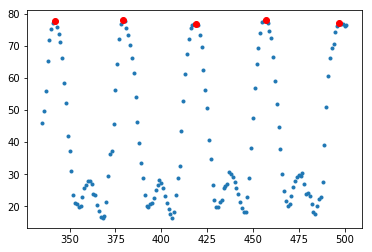

In [13]:
plt.plot(out2['intensity'], '.')
plt.plot(out2.loc[extrema2]['intensity'], 'ro')

In [14]:
out0.loc[extrema0]['time']


336    1.532127e+09
372    1.532127e+09
409    1.532127e+09
450    1.532127e+09
488    1.532128e+09
Name: time, dtype: float64

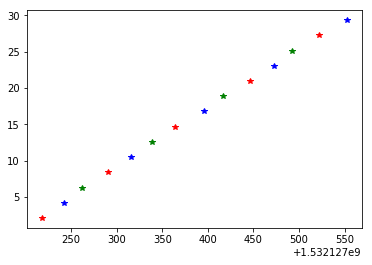

In [43]:
# Проверка линейности появления экстремумов по времени
L0 = len(out0.loc[extrema0]['time'])
L1 = len(out1.loc[extrema1]['time'])
L2 = len(out2.loc[extrema2]['time'])

plt.plot(out0.loc[extrema0]['time'], (2 * np.pi / 3)  + 2 * np.pi * np.arange(L0) , 'r*')
plt.plot(out1.loc[extrema1]['time'], (6 * np.pi / 3 ) + 2 * np.pi * np.arange(L1) , 'g*')
plt.plot(out2.loc[extrema2]['time'], (4 * np.pi / 3 ) + 2 * np.pi * np.arange(L2) , 'b*')

In [60]:
times = np.concatenate((out0.loc[extrema0]['time'].values, out1.loc[extrema1]['time'].values,
                       out2.loc[extrema2]['time'].values))
times = np.sort(times)

In [61]:
aliquots = np.concatenate(((2 * np.pi / 3)  + 2 * np.pi * np.arange(L0), 
                          (6 * np.pi / 3)  + 2 * np.pi * np.arange(L1),
                          (4 * np.pi / 3)  + 2 * np.pi * np.arange(L2)))
aliquots = np.sort(aliquots)

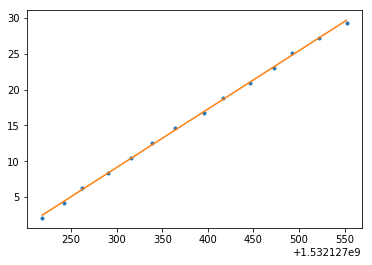

In [76]:
fit = np.polyfit(times, aliquots, 1)
plt.plot(times, aliquots, '.')
x = np.linspace(times[0], times[-1], 100)
y = fit[0] * x + fit[1]
plt.plot(x, y)

In [91]:
out0['phase'] = ( out0['time'].values * fit[0] + fit[1] ) % (2 * np.pi)
out1['phase'] = ( out1['time'].values * fit[0] + fit[1] ) % (2 * np.pi)
out2['phase'] = ( out2['time'].values * fit[0] + fit[1] ) % (2 * np.pi)

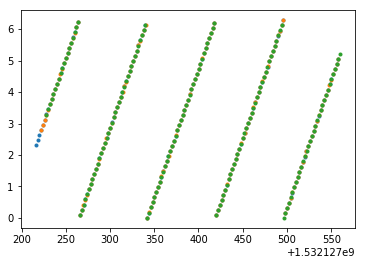

In [95]:
plt.plot(out0['time'].values, out0['phase'].values, '.')
plt.plot(out1['time'].values, out1['phase'].values, '.')
plt.plot(out2['time'].values, out2['phase'].values, '.')

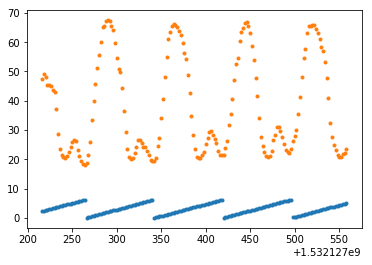

In [96]:
plt.plot(out0['time'].values, out0['phase'].values, '.')
plt.plot(out0['time'].values, out0['intensity'].values, '.')

Text(0.5, 1.0, 'out2')

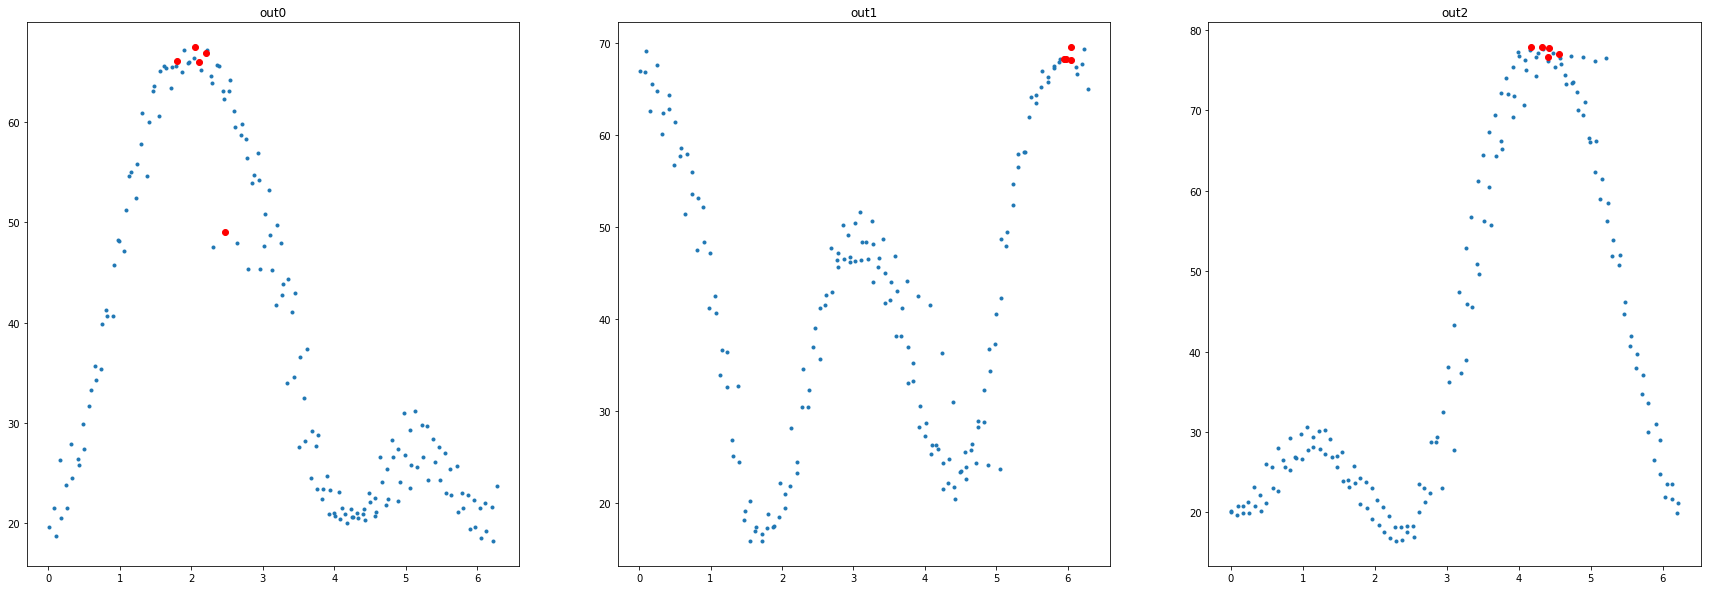

In [119]:
plt.figure(figsize = (30, 10))

plt.subplot(131)
plt.plot(out0['phase'].values, out0['intensity'].values, '.')
plt.plot(out0['phase'].loc[extrema0].values, out0['intensity'].loc[extrema0].values, 'ro')
plt.title('out0')

plt.subplot(132)
plt.plot(out1['phase'].values, out1['intensity'].values, '.')
plt.plot(out1['phase'].loc[extrema1].values, out1['intensity'].loc[extrema1].values, 'ro')
plt.title('out1')

plt.subplot(133)
plt.plot(out2['phase'].values, out2['intensity'].values, '.')
plt.plot(out2['phase'].loc[extrema2].values, out2['intensity'].loc[extrema2].values, 'ro')
plt.title('out2')

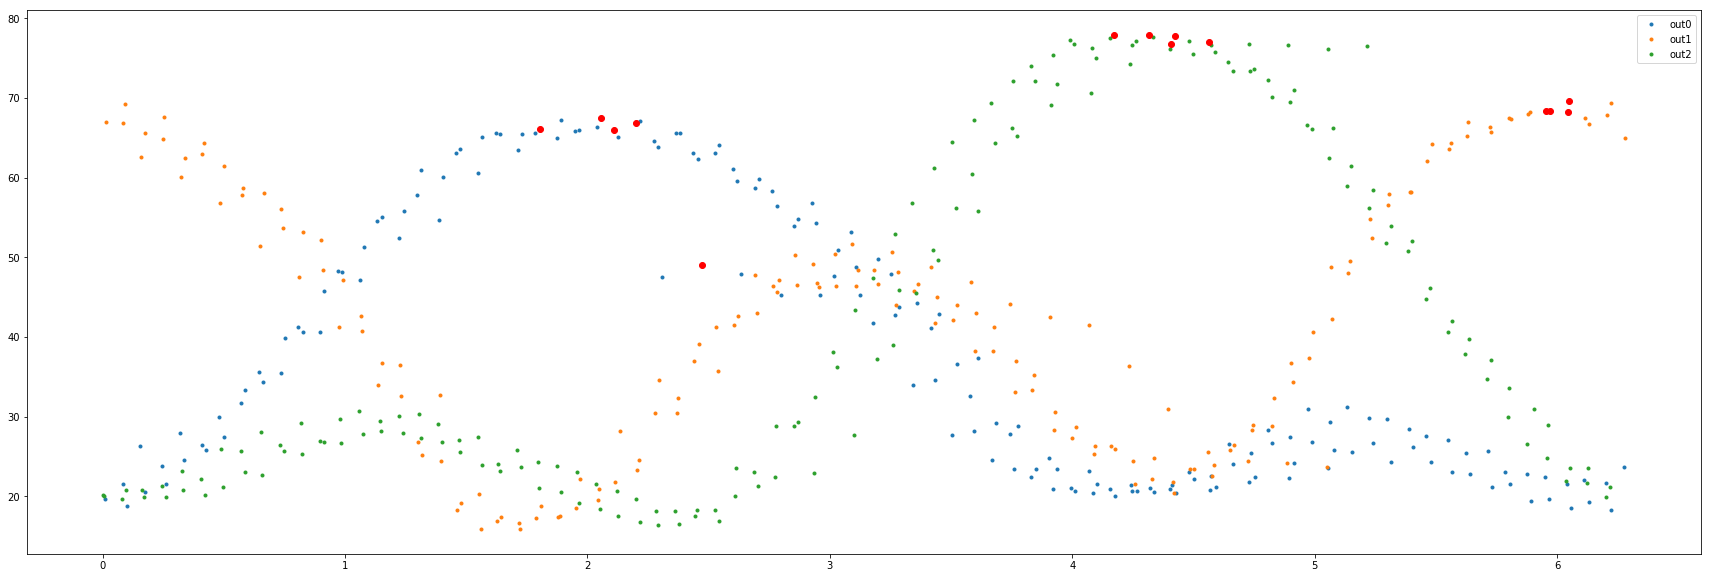

In [120]:
plt.figure(figsize = (30, 10))

plt.plot(out0['phase'].values, out0['intensity'].values, '.', label = 'out0')
plt.plot(out0['phase'].loc[extrema0].values, out0['intensity'].loc[extrema0].values, 'ro')
plt.plot(out1['phase'].values, out1['intensity'].values, '.', label = 'out1')
plt.plot(out1['phase'].loc[extrema1].values, out1['intensity'].loc[extrema1].values, 'ro')
plt.plot(out2['phase'].values, out2['intensity'].values, '.', label = 'out2')
plt.plot(out2['phase'].loc[extrema2].values, out2['intensity'].loc[extrema2].values, 'ro')

plt.legend()

In [144]:
data0 = out0.rename(index = str, columns = {'intensity': 'out0'})

In [145]:
data0['out1'] = [np.NaN] * len(data0)
data0['out2'] = [np.NaN] * len(data0)

In [146]:
data0.head()

,out0,time,phase,out1,out2
335,47.55438,1.532127e+09,2.308835,NaN,NaN
336,49.07384,1.532127e+09,2.471903,NaN,NaN
337,47.94281,1.532127e+09,2.634970,NaN,NaN
338,45.31088,1.532127e+09,2.798038,NaN,NaN
339,45.30846,1.532127e+09,2.961026,NaN,NaN


In [152]:
data1 = out1.rename(index = str, columns = {'intensity': 'out1'})
data2 = out2.rename(index = str, columns = {'intensity': 'out2'})

data1['out0'] = [np.NaN] * len(data1)
data1['out2'] = [np.NaN] * len(data1)
data2['out0'] = [np.NaN] * len(data2)
data2['out1'] = [np.NaN] * len(data2)

In [222]:
data = pd.concat([data0, data1, data2], ignore_index=True, sort=False)

In [264]:
data = data.sort_values('phase')
data = data.reset_index(drop = True)
data = data.reindex(['time', 'out0', 'out1', 'out2', 'phase'], axis=1)

In [265]:
data = data.fillna(method = 'ffill')
data = data.fillna(method = 'bfill')

In [432]:
N = 0.1
ind_test = np.random.choice( data.index.values, size = int(len(data) * N))

In [433]:
ind_train = []
for i in data.index.values:
    if i not in ind_test:
        ind_train.append(i)
ind_train = np.array(ind_train)

In [653]:
#i = ind_test[0]
i = np.random.choice(data.index.values)

In [654]:
data.loc[i]

time     1.532127e+09
out0     5.126169e+01
out1     3.259876e+01
out2     2.787808e+01
phase    1.238768e+00
Name: 92, dtype: float64

In [655]:
round1 = (data.loc[ind_train].out0 - data.loc[i].out0)
round1.sort_values(inplace = True)
round1 = round1[abs(round1) < 5]
#round1 = round1[:10]

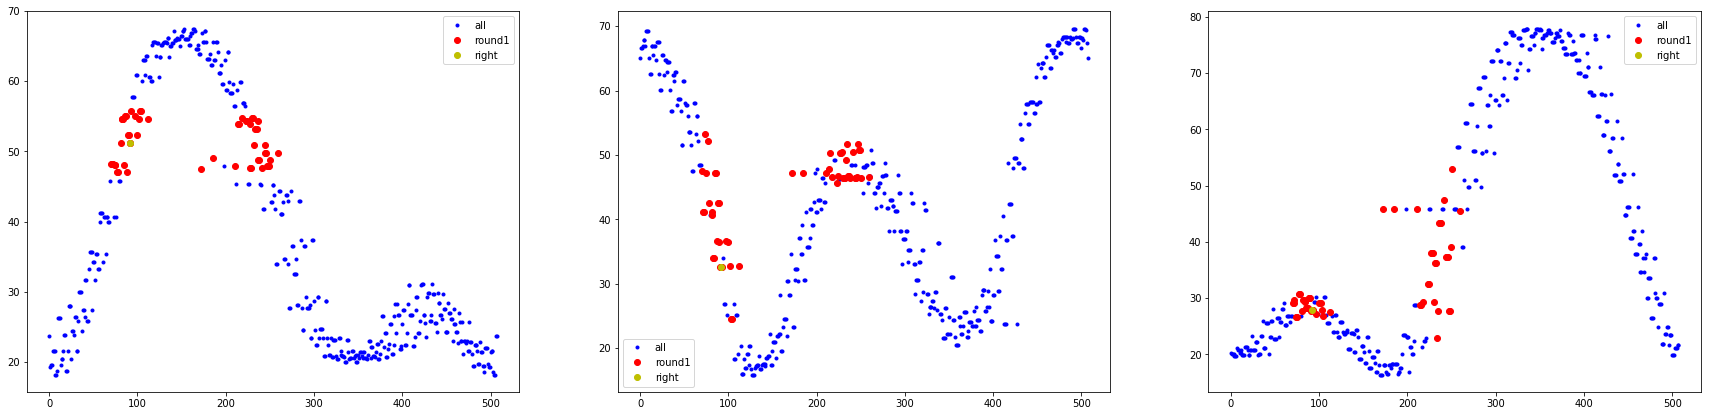

In [656]:
plt.figure(figsize = (30, 7))

plt.subplot(131)
plt.plot(data.out0, 'b.', label = 'all')
plt.plot(data.loc[round1.index].out0, 'ro', label = 'round1')
plt.plot(i, data.loc[i].out0, 'yo', label = 'right')
plt.legend()

plt.subplot(132)
plt.plot(data.out1, 'b.', label = 'all')
plt.plot(data.loc[round1.index].out1, 'ro', label = 'round1')
plt.plot(i, data.loc[i].out1, 'yo', label = 'right')
plt.legend()

plt.subplot(133)
plt.plot(data.out2, 'b.', label = 'all')
plt.plot(data.loc[round1.index].out2, 'ro', label = 'round1')
plt.plot(i, data.loc[i].out2, 'yo', label = 'right')
plt.legend()

In [657]:
round2 = data.loc[round1.index].out1 - data.loc[i].out1
round2.sort_values(inplace = True)
round2 = round2[abs(round2) < 10]
#round2 = round2[:20]

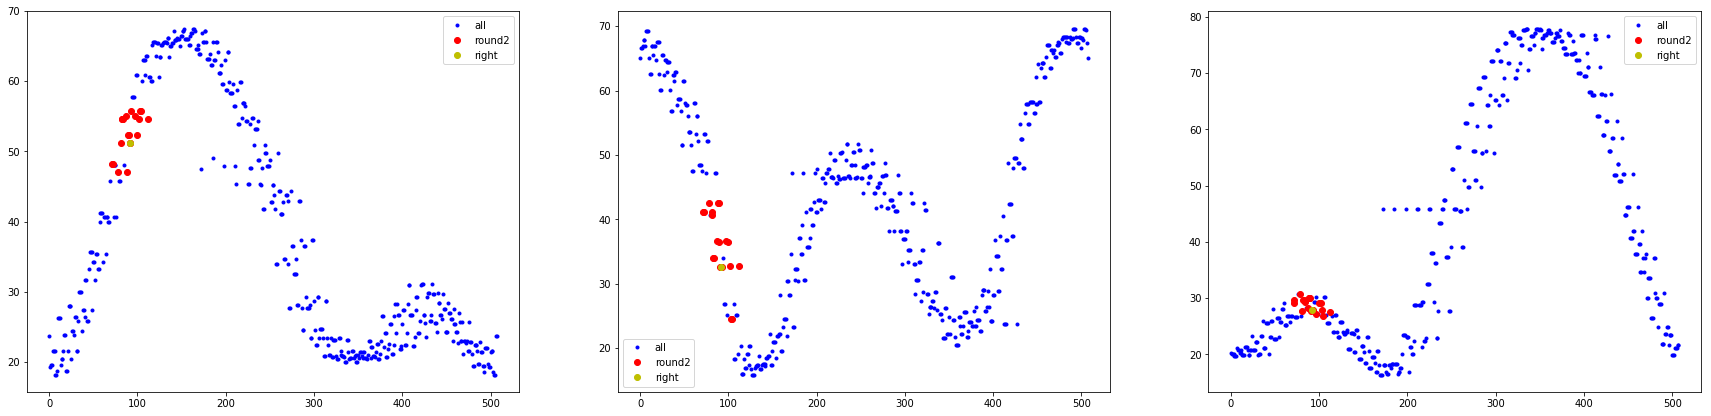

In [658]:
plt.figure(figsize = (30, 7))

plt.subplot(131)
plt.plot(data.out0, 'b.', label = 'all')
plt.plot(data.loc[round2.index].out0, 'ro', label = 'round2')
plt.plot(i, data.loc[i].out0, 'yo', label = 'right')
plt.legend()

plt.subplot(132)
plt.plot(data.out1, 'b.', label = 'all')
plt.plot(data.loc[round2.index].out1, 'ro', label = 'round2')
plt.plot(i, data.loc[i].out1, 'yo', label = 'right')
plt.legend()

plt.subplot(133)
plt.plot(data.out2, 'b.', label = 'all')
plt.plot(data.loc[round2.index].out2, 'ro', label = 'round2')
plt.plot(i, data.loc[i].out2, 'yo', label = 'right')
plt.legend()

In [659]:
round3 = data.loc[round2.index].out2 - data.loc[i].out2
round3.sort_values(inplace = True)
#round3 = round3[abs(round3) < 2]
round3 = round3[:5]

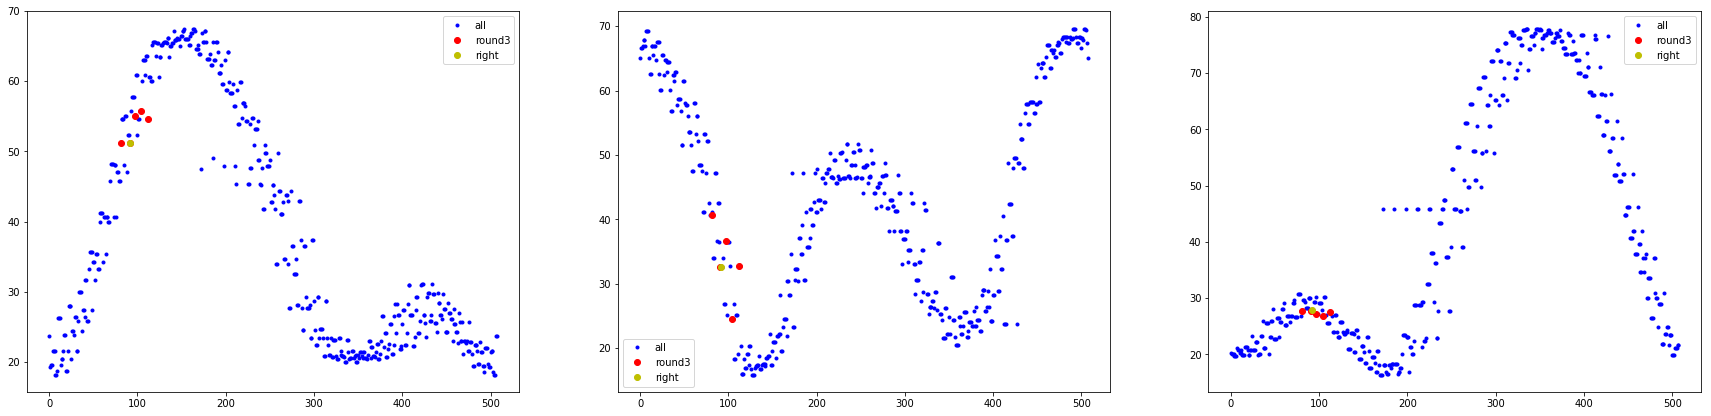

In [660]:
plt.figure(figsize = (30, 7))

plt.subplot(131)
plt.plot(data.out0, 'b.', label = 'all')
plt.plot(data.loc[round3.index].out0, 'ro', label = 'round3')
plt.plot(i, data.loc[i].out0, 'yo', label = 'right')
plt.legend()

plt.subplot(132)
plt.plot(data.out1, 'b.', label = 'all')
plt.plot(data.loc[round3.index].out1, 'ro', label = 'round3')
plt.plot(i, data.loc[i].out1, 'yo', label = 'right')
plt.legend()

plt.subplot(133)
plt.plot(data.out2, 'b.', label = 'all')
plt.plot(data.loc[round3.index].out2, 'ro', label = 'round3')
plt.plot(i, data.loc[i].out2, 'yo', label = 'right')
plt.legend()

In [661]:
data.loc[round3.index].phase.mean()

1.3146448042079668

In [662]:
data.loc[i].phase

1.2387679030550558

In [682]:
def predict(i, ind_train):   
    round1 = (data.loc[ind_train].out0 - data.loc[i].out0)
    round1.sort_values(inplace = True)
    round1 = round1[abs(round1) < 20]
#    round1 = round1[:20]

    round2 = data.loc[round1.index].out1 - data.loc[i].out1
    round2.sort_values(inplace = True)
    round2 = round2[abs(round2) < 10]
#    round2 = round2[:10]

    round3 = data.loc[round2.index].out2 - data.loc[i].out2
    round3.sort_values(inplace = True)
    round2 = round2[abs(round2) < 5]
#    round3 = round3[:5]

    return data.loc[round3.index].phase.mean()


In [663]:
predictions = []
for i in ind_test:
    predictions.append(predict(i, ind_train))

In [664]:
real = data.loc[ind_test].phase.values
for i in range(len(predictions)):
    print(predictions[i], real[i] )

2.558000440814131 2.7837109635378994
4.736850490777181 5.217955752234872
4.488388988585937 4.830401967967852
2.558000440814131 2.940973706057278
0.3532787758206794 5.229336119702069
0.18610147854851533 0.4820149084142997
2.328352059132223 2.2187000771416265
2.3768288407796874 1.4588680406622245
0.9065812724923561 3.604876399040222
0.7965016287628458 3.272830463459698
0.18610147854851533 5.634381141270502
2.524113498336439 2.707739677037104
0.15460312089489747 0.40624332727582413
0.24563042364322457 0.738262343422484
4.736850490777181 4.643987345711302
0.18610147854851533 0.010248012354580283
2.3768288407796874 1.3145451764371074
0.8174605943906812 3.593162632992474
2.1790042716359563 1.9582077851108863
0.15460312089489747 0.5810208727968771
4.488388988585937 4.989138584340914
0.21585069896371323 0.5721700966516252
2.751616558253919 3.66571982504518
0.7965016287628458 3.430098063757626
0.6398593203363717 5.297750461117339
1.2451865697033497 3.3630353619707662
4.5252528969520585 4.559770

In [665]:
error = predictions - real

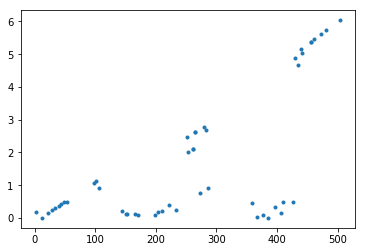

In [666]:
plt.plot(ind_test, abs(error), '.')

In [667]:
import numpy.linalg as LA

In [668]:
LA.norm(error)

18.462520126398367

In [669]:
sum(error ** 2) ** 0.5

18.462520126398367

In [683]:
def get_prediction(ind_test, ind_train):
    predictions = []
    for i in ind_test:
        predictions.append(predict(i, ind_train))
    real = data.loc[ind_test].phase.values
    error = predictions - real
    return predictions, error

In [684]:
def get_split(N = 0.1):
    ind_test = np.random.choice( data.index.values, size = int(len(data) * N))
    ind_train = []
    for i in data.index.values:
        if i not in ind_test:
            ind_train.append(i)
    ind_train = np.array(ind_train)
    return ind_test, ind_train

In [695]:
# на каких индексах ошибка больше? Покажет кроссвалидация
predictions = []
errors = []
ind = []
for i in range(50):
    i_test, i_train = get_split(0.1)
    prediction, error = get_prediction(i_test, i_train)
    errors.append(error)
    ind.append(i_test)
    predictions.append(prediction)

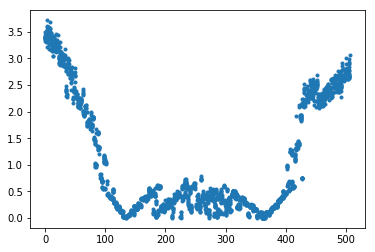

In [696]:
plt.plot(np.array(ind).flatten(), abs(np.array(errors).flatten()), '.')

In [694]:
# какая ошибка в среднем?

errors = []
ind = []
for i in range(10):
    i_test, i_train = get_split(0.1)
    predictions, error = get_prediction(i_test, i_train)
    errors.append(LA.norm(error))

In [693]:
predictions

[2.7375866273306717,
 1.8725717360474328,
 4.155976972028158,
 4.428482164390659,
 4.261068095631137,
 2.94345670737368,
 3.3210622858083028,
 2.9385803738361984,
 3.071207327404467,
 2.1112209245084532,
 4.199680434892758,
 1.8297716392036785,
 3.381950859198834,
 2.4518579461374914,
 1.8933144010778025,
 1.809482840197232,
 2.9552994184367307,
 3.391213320973609,
 1.809482840197232,
 4.454198314971284,
 2.6789597987230445,
 3.786968689444037,
 3.349955009627445,
 3.369206539574,
 1.8725717360474328,
 3.336725418860189,
 3.3846965151086374,
 3.246604135391147,
 4.491300471282821,
 3.3210622858083023,
 3.4375993372323026,
 1.9275529526477542,
 2.8964382340859034,
 2.5124365128944044,
 2.4914735689665477,
 1.8334027398530703,
 3.4077743457420904,
 2.9956981966765865,
 2.5828916342166415,
 3.336725418860189,
 3.3944828433494467,
 3.369206539574,
 2.908813380591642,
 2.7375866273306717,
 2.9385803738361984,
 1.942669038573916,
 2.9698963301992443,
 2.6188208395139396,
 3.4077743457420904,

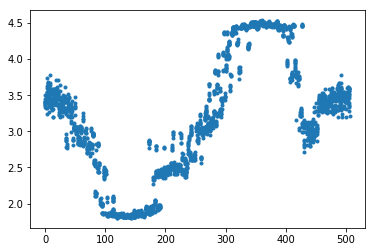

In [697]:
plt.plot(np.array(ind).flatten(), np.array(predictions).flatten(), '.')